In [89]:
import numpy as np 
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle 

# Import Data

We know the first column of the dataframe is the individual ID, so lets make it an index column 

In [43]:
df_segmentation = pd.read_csv('segmentation data.csv', index_col= 0)
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


# Explore Data

In [44]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [45]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# Correlation Estimate

We will be using a Pearson Correlation (default approach to most correlations)
    describes the linear dependency between variables
    ranges from -1 to 1 (1 = very postitve correlation, -1 = strong negative correlation, 0 = not linearly independent)

The diagonal values show the correlation of a variable with itself so it's always 1

In [46]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


# Creating a Heatmap

figsize = width,height 

vmin & vmax sets the boundaries (-1 & 1 was the range for the Pearson Correlation)

We need to label our graph 
    labels for y and x axis (rotate x label by 90 degrees)

Set a title as well 

<function matplotlib.pyplot.show(close=None, block=None)>

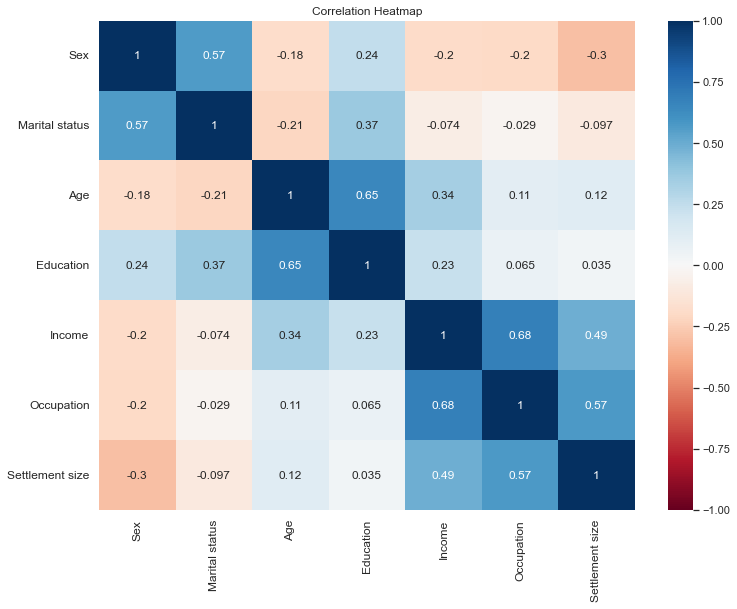

In [47]:
plt.figure(figsize = (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show

# Visualize Raw Data

Plotting against different columns 

Text(0.5, 1.0, 'Visualization of Raw Data')

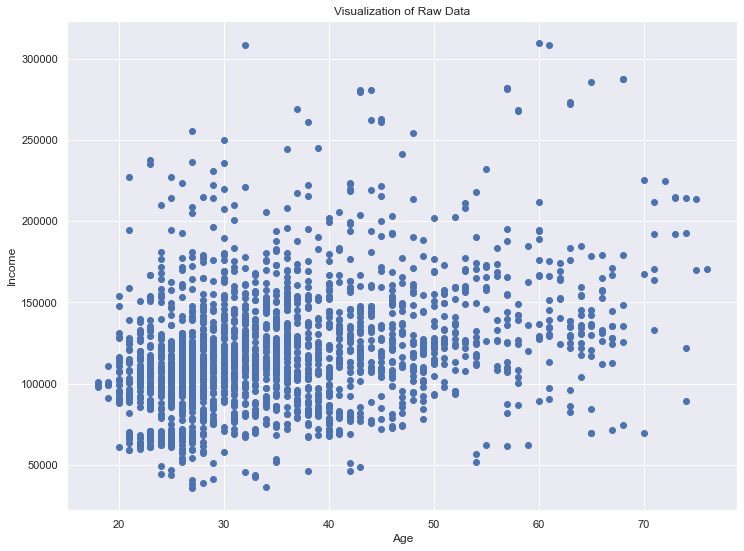

In [48]:
plt.figure(figsize = (12,9))
plt.scatter(df_segmentation.iloc[:,2], df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

# Standardizing the Data

The purpose:
    
Say we have a 20 and a 70 year old (the difference is 50 years)

20 year old makes 100k and the 70 year old makes 150k (difference is $50k)

If we don't standardize the data, the age would be ruled out and more weight would be put on the income difference in our model

We need to treat all our features the same and make sure they all fall within the same numerical range 

In [49]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

# Hierarchical Clustering 

dendrogram: tree-like, hierarchical representation of points

linkage = refers to the specifc clusterinig methods we employ

ward = performs a hierarchical clustering with our data


In [50]:
hier_clust = linkage(segmentation_std, method = 'ward')

# What does the graph mean 

The bottom of the plot are the observations
    that means the 2000 people (or individual points) in our dataset

The distance is the y-axis  

the distance between the points are represented by the vertical lines 

the smaller the distance between the points, the further down in the tree their be grouped together 

we are going to truncate plot which will show us the last 5 merged cluster levels 

<function matplotlib.pyplot.show(close=None, block=None)>

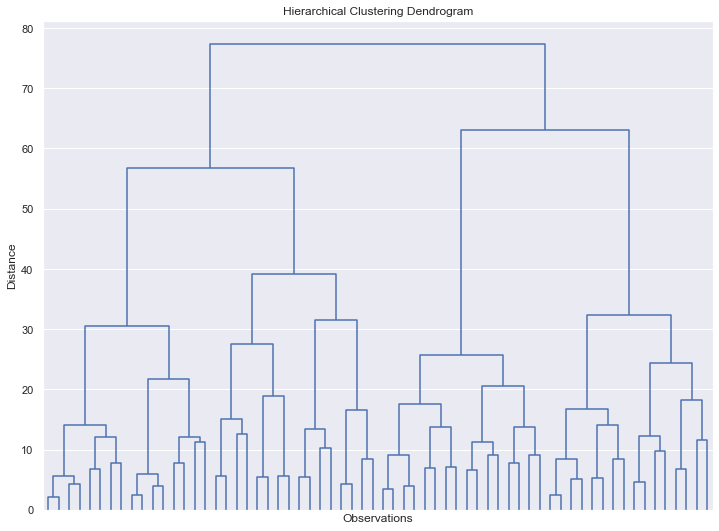

In [51]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
            truncate_mode = 'level',
            p = 5,
            show_leaf_counts = False,
            no_labels = True,
            color_threshold = 0)
plt.show


# removing the color threshold to see the four cluster

<function matplotlib.pyplot.show(close=None, block=None)>

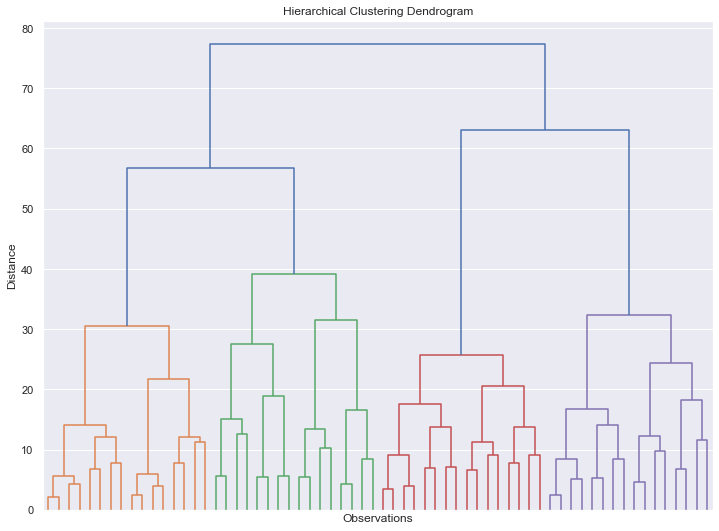

In [52]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
            truncate_mode = 'level',
            p = 5,
            show_leaf_counts = False,
            no_labels = True)
plt.show

# K-means clustering

Using WCSS which is the sum of squared distances between each point and the centroid in a cluster

You want to run the algorithm 10 different times 

k-means++ = is an initialization algorithm that finds the best cluster seeds (finds the best starting points for the centroids)

random_state = insures we will get the same initial centroids if we run the code multiple times (set to any number you like)

in each iteration we add a value to the (WCSS) arrray which is stored in the (Inertia) attribute 


In [53]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)


# Plot the results 

WCSS values against the # of clusters 

x axis will have range (1,11)
y axis will have the WCSS variable 

We see the graph drastically decreasing
    sometimes it can decrease rapidly, other times more smoothly

How do we determine the number of clusters we want?
    The Elbow Method,
    usuallly the part of the graph before the elbow would be steeply declining and the part after it would be smooth
    so we can assume 4 is the right amount 

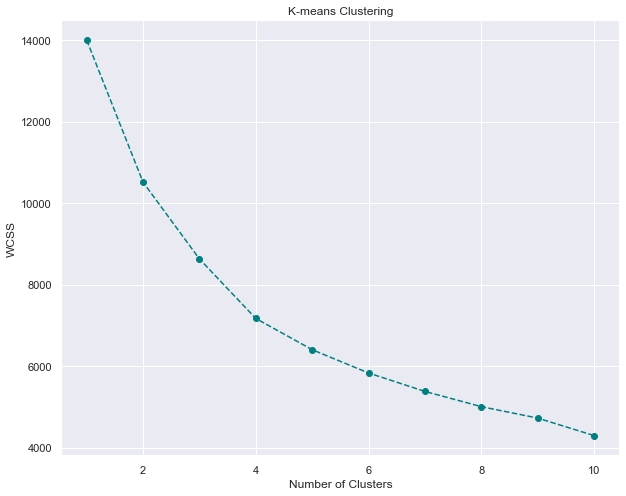

In [54]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--', color = 'teal')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()



# Performing K-Means Clusterings w/ 4 clusters

In [55]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# We Fit the data using our standardize data 

In [56]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

# Results

Add a new column and copy dataframe

New column will contain the predictive clusters for each observation in the dataset 

In [57]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_


# We will try to understand what the different clusters mean 

What the characteristics of the people in each of the clusters are 

We will calculate the mean values of each feature by clusters 

In [58]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


# Now we need to look at the size of the clusters compared to the entire dataset

Note in the 'group by' statement we need to include a second argument (column), in order to count each row in the table.
    You can chose an arbitrary column, I choose to select 'Sex'.

New column called number of observations (N Obs)

In [59]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

# Calculate the proportions of these segments

    We want to know how much of the whole population each cluster represents 

    New column called proportion of observations (Prop Obs)

In [60]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [61]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


# Adding the information into our tables 

In [62]:
df_segm_analysis.rename({0:'well-off',
                        1:'fewer-opportunities',
                        2:'standard',
                        3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


# Visualizing our Data 

We are plotting the raw data rather then the standardize,
    the only difference is that this time we have the segments 

Add new segments to df_segm_kmeans. We need to map our new labels to the segment names (0,1,2,3)

In [63]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer-opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})

# We initialize the x and y axis first for convenience 

We can use the segment labels as colors 

/Users/justjp/opt/miniconda3/envs/customer_env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


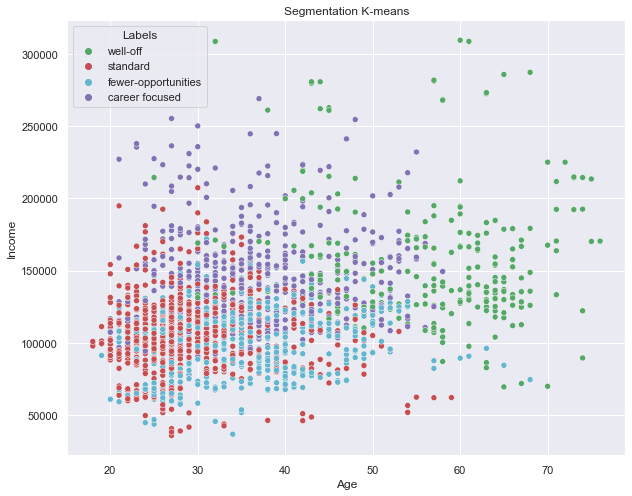

In [64]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()